Alberto Geroldi 968236
# <span style="color:green">Numerical simulation laboratory (NSL)</span>  
# Exercise 6

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## EX 6.1

Compute the quantites:  
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

In [14]:
with open("../ising/input.dat") as file:
    N_spin = int(file.readline())
    J = float(file.readline())
    h = float(file.readline())
    m_g = int(file.readline())
    N_block = int(file.readline())
    N_step = int(file.readline())
    N_therm = int(file.readline())
print(f"N spin = {N_spin}")
print(f"J = {J}")
print(f"h = {h}")
print(f"metropolis or gauss 1|0 = {m_g}")
print(f"N block = {N_block}")
print(f"N step = {N_step}")
print(f"N therm = {N_therm}")

N spin = 50
J = 1.0
h = 0.02
metropolis or gauss 1|0 = 0
N block = 100
N step = 10000
N therm = 1000000


**ONLY magnetization with h = 0.02**, the other quantities are computed with **h = 0**

In [15]:
#theoretical data
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

### 6.1.1 Internal energy computed with Metropolis and Gibbs sampling

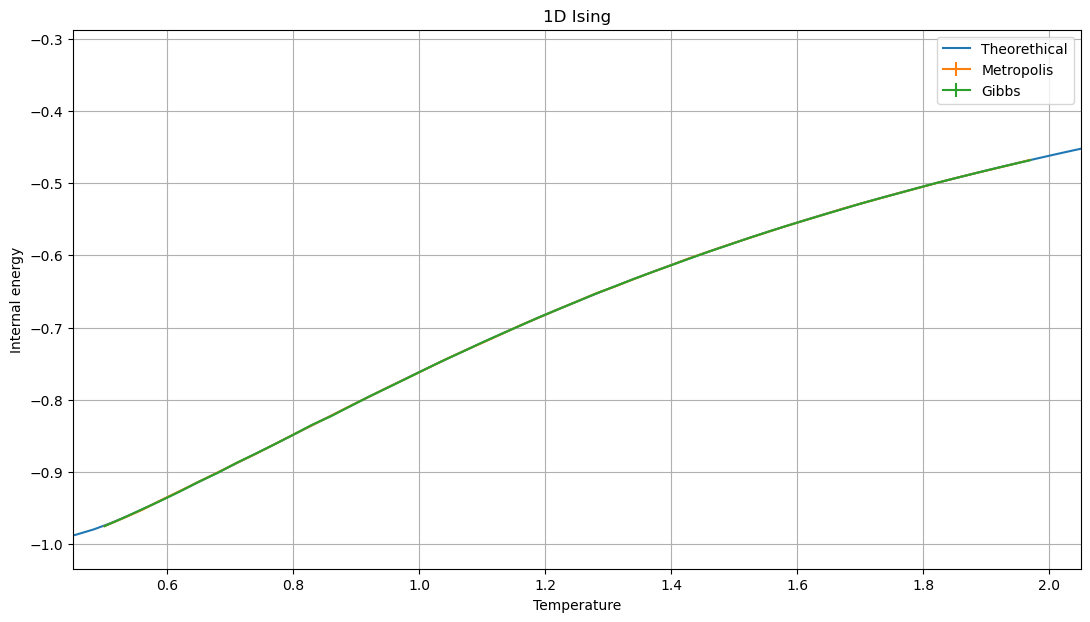

In [16]:
plt.figure(figsize=(13,7))
plt.title('1D Ising')

#fit theorethical curve
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label='Theorethical')

#metropolis sampling
x, y, err_u = np.loadtxt("data/energy_T_metropolis.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_u, label='Metropolis')

#gibbs sampling
x, y, err_u = np.loadtxt("data/energy_T_gibbs.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_u, label='Gibbs')

plt.xlim(0.45, 2.05)
plt.xlabel('Temperature')
plt.ylabel('Internal energy')
plt.grid(True)
plt.legend()
plt.show()

### 6.1.2 Heat capacity computed with Metropolis and Gibbs sampling

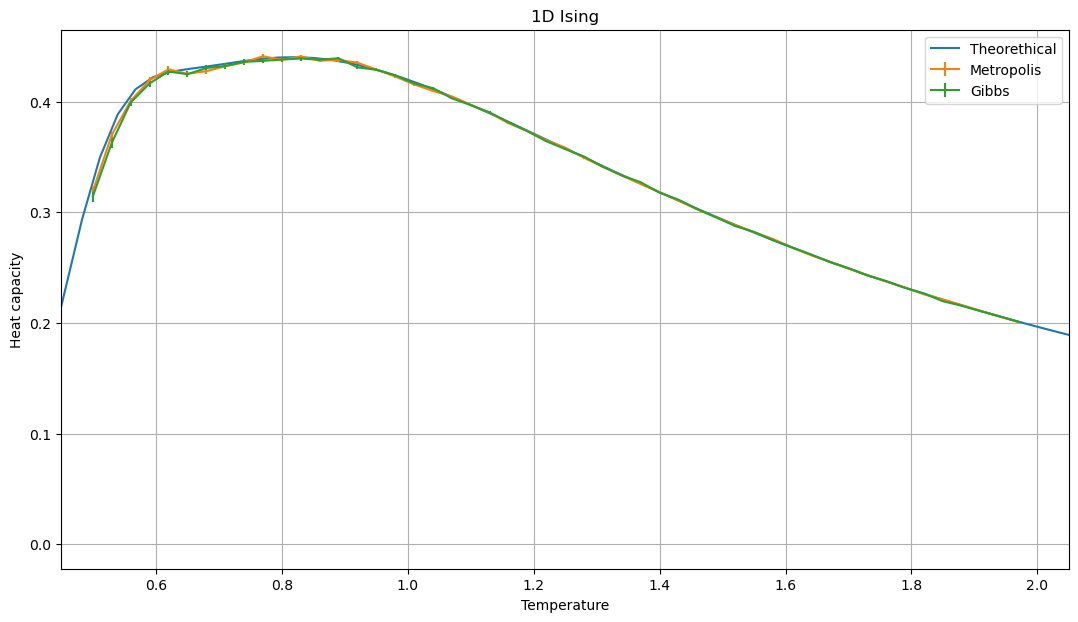

In [17]:
plt.figure(figsize=(13,7))
plt.title('1D Ising')

#fit theorethical curve
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label='Theorethical')

#metropolis sampling
x, y, err_c = np.loadtxt("data/heat_T_metropolis.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_c, label='Metropolis')

#gibbs sampling
x, y, err_c = np.loadtxt("data/heat_T_gibbs.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_c, label='Gibbs')

plt.xlim(0.45, 2.05)
plt.xlabel('Temperature')
plt.ylabel('Heat capacity')
plt.grid(True)
plt.legend()
plt.show()

### 6.1.3 Magnetic susceptibility computed with Metropolis and Gibbs sampling

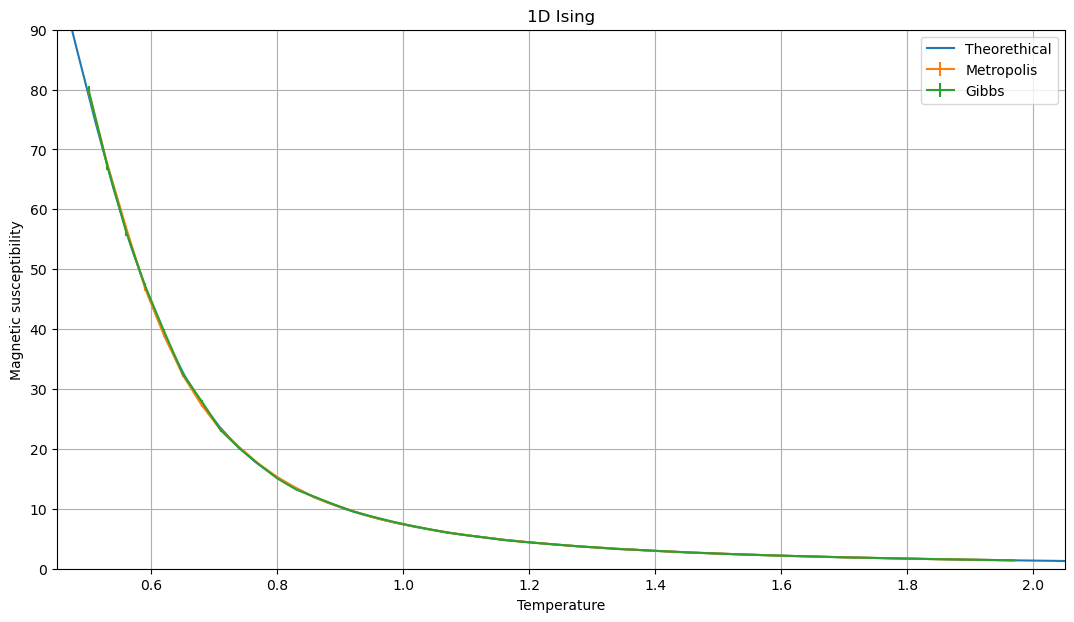

In [19]:
plt.figure(figsize=(13,7))
plt.title('1D Ising')

#fit theorethical curve
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label='Theorethical')

#metropolis sampling
x, y, err_x = np.loadtxt("data/chi_T_metropolis.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_x, label='Metropolis')

#gibbs sampling
x, y, err_x = np.loadtxt("data/chi_T_gibbs.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_x, label='Gibbs')

plt.xlim(0.45, 2.05)
plt.ylim(0.0, 90.0)
plt.xlabel('Temperature')
plt.ylabel('Magnetic susceptibility')
plt.grid(True)
plt.legend()
plt.show()

### 6.1.4 Magnetization computed with Metropolis and Gibbs sampling (h = 0.02)

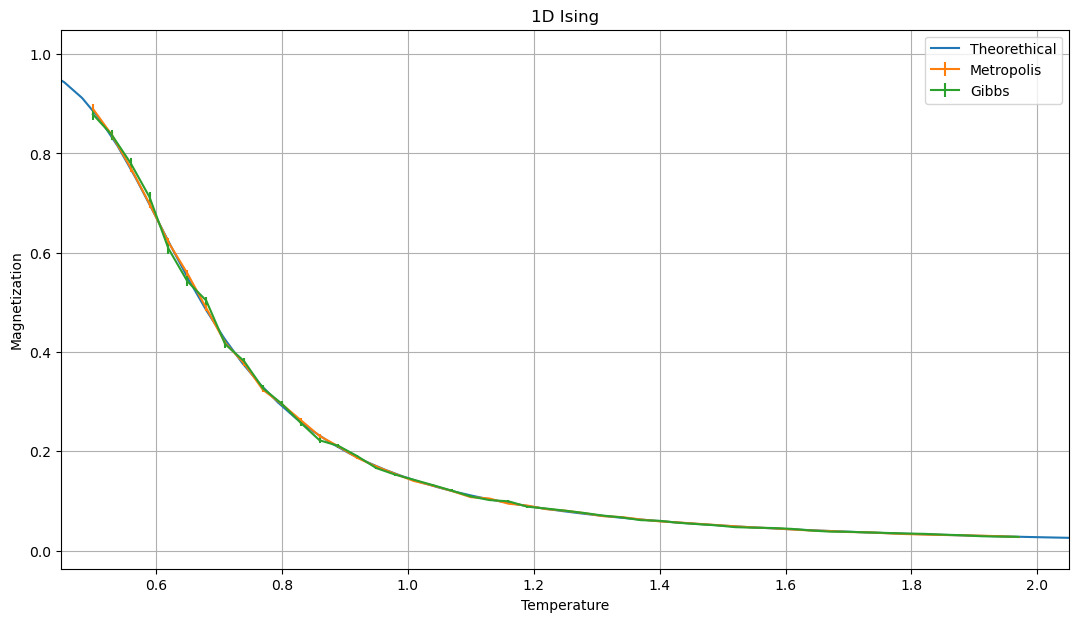

In [20]:
plt.figure(figsize=(13,7))
plt.title('1D Ising')

#fit theorethical curve
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label='Theorethical')

#metropolis sampling
x, y, err_m = np.loadtxt("data/magn_T_metropolis.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_m, label='Metropolis')

#gibbs sampling
x, y, err_m = np.loadtxt("data/magn_T_gibbs.out", usecols=(0,1,2), unpack='true')
plt.errorbar(x,y,yerr=err_m, label='Gibbs')

plt.xlim(0.45, 2.05)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.grid(True)
plt.legend()
plt.show()